In [1]:
#%load_ext lab_black

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.ticker import FormatStrFormatter
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# Loading reported and synthetic data

In [3]:
# Revoking stored reported data
# https://ipython.org/ipython-doc/rel-0.12/config/extensions/storemagic.html

%store -r data_Averoy
%store -r data_Tingvoll
%store -r data_Surnadal
%store -r data_Sunndal
%store -r data_Vestnes
%store -r data_Laerdal

In [4]:
# Data needed for plotting the figures below
compare = "before_hunt"
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]

afont = {"fontname": "Arial"}

# Plotting and saving figure

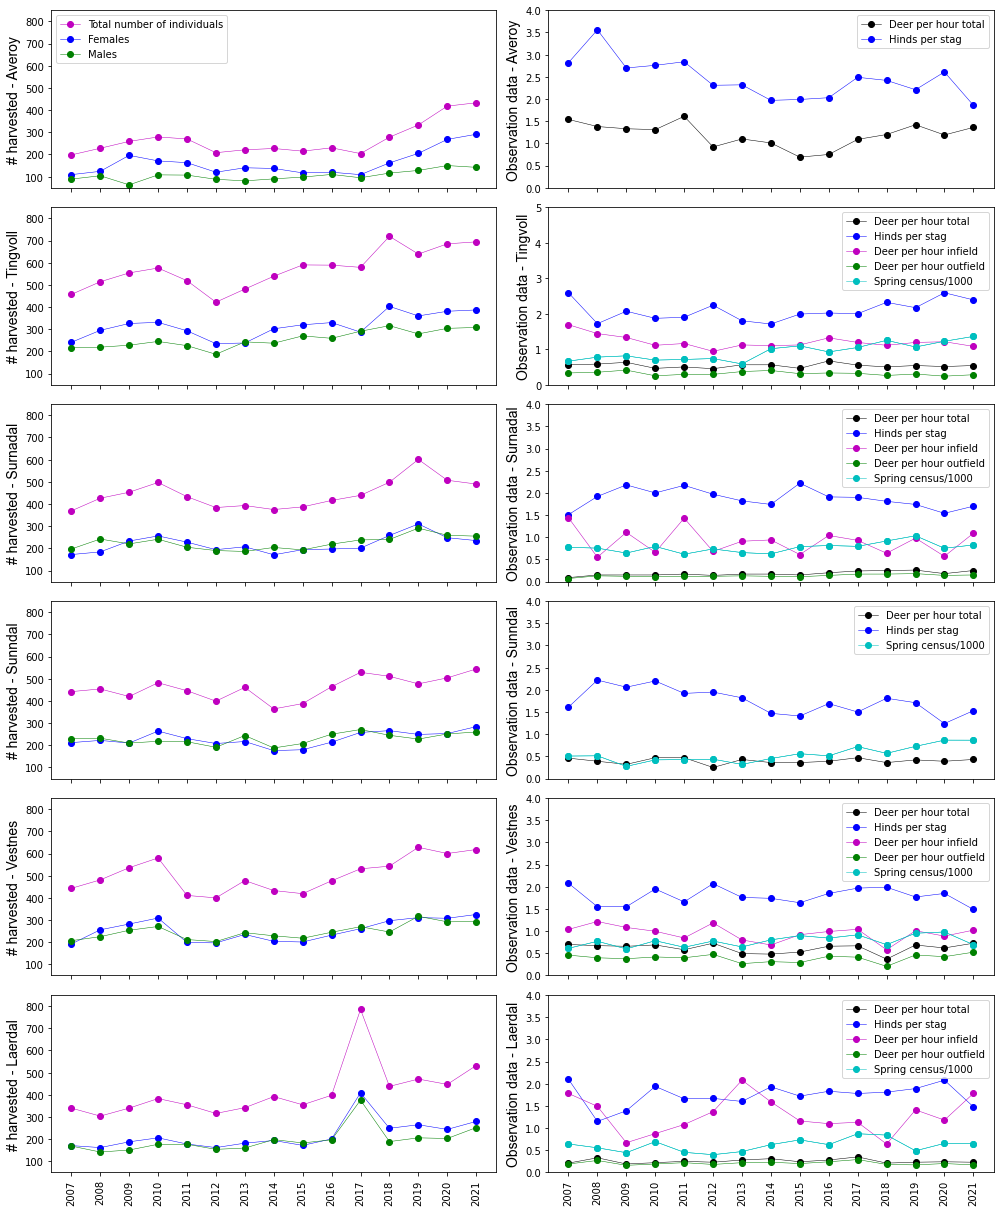

In [5]:
fig, ax = plt.subplots(6, 2, figsize=(14, 18))
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]

axis = [
    [ax[0][0], ax[0][1]],
    [ax[1][0], ax[1][1]],
    [ax[2][0], ax[2][1]],
    [ax[3][0], ax[3][1]],
    [ax[4][0], ax[4][1]],
    [ax[5][0], ax[5][1]],
]

i = 0
for municipality in municipalities:
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_outfield,
        seen_deer_obs_infield,
        hinds_per_stag_obs,
        total_harvest,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[i]

    # Transforming the above fractional data to numbers
    number_harvested_female_calves = np.round(
        np.multiply(np.array(fraction_female_calves_harvested), np.array(total_harvest))
        / 100
    )
    number_harvested_male_calves = np.round(
        np.multiply(np.array(fraction_male_calves_harvested), np.array(total_harvest))
        / 100
    )
    number_harvested_young_hinds = np.round(
        np.multiply(np.array(fraction_young_hinds_harvested), np.array(total_harvest))
        / 100
    )
    number_harvested_adult_hinds = np.round(
        np.multiply(np.array(fraction_adult_hinds_harvested), np.array(total_harvest))
        / 100
    )
    number_harvested_young_stags = np.round(
        np.multiply(np.array(fraction_young_stags_harvested), np.array(total_harvest))
        / 100
    )
    number_harvested_adult_stags = np.round(
        np.multiply(np.array(fraction_adult_stags_harvested), np.array(total_harvest))
        / 100
    )

    time_axis = np.arange(number_of_years)

    # Plotting the three graphs in the left figure panels
    females_harvested = (
        number_harvested_female_calves
        + number_harvested_young_hinds
        + number_harvested_adult_hinds
    )
    males_harvested = (
        number_harvested_male_calves
        + number_harvested_young_stags
        + number_harvested_adult_stags
    )

    axis[i][0].plot(
        time_axis, total_harvest, "mo", markersize=6, linestyle="-", linewidth=0.5
    )
    axis[i][0].plot(
        time_axis,
        females_harvested,
        "bo",
        markersize=6,
        linestyle="-",
        linewidth=0.5,
    )
    axis[i][0].plot(
        time_axis,
        males_harvested,
        "go",
        markersize=6,
        linestyle="-",
        linewidth=0.5,
    )

    axis[i][0].set_xticks(time_axis)
    axis[i][0].set_xticklabels([])
    if municipality == "Laerdal":
        axis[i][0].set_xticks(time_axis)
        axis[i][0].set_xticklabels(years, rotation="vertical")

    ymin = 50
    ymax = 850
    ax[i][0].set_ylim([ymin, ymax])
    axis[i][0].set_ylabel("# harvested" + " - " + municipality, fontsize=14, **afont)

    if municipality == "Averoy":
        axis[i][0].legend(
            ["Total number of individuals", "Females", "Males"], loc="upper left"
        )

    # Plotting graphs in the right figure panel - must deal with missing data
    axis[i][1].plot(
        time_axis, seen_deer_obs, "ko", markersize=6, linestyle="-", linewidth=0.5
    )
    axis[i][1].plot(
        time_axis, hinds_per_stag_obs, "bo", markersize=6, linestyle="-", linewidth=0.5
    )
    if municipality == "Averoy":
        axis[i][1].legend(["Deer per hour total", "Hinds per stag"], loc="upper right")

    if (
        (municipality == "Tingvoll")
        | (municipality == "Surnadal")
        | (municipality == "Vestnes")
        | (municipality == "Laerdal")
    ):
        axis[i][1].plot(
            time_axis,
            seen_deer_obs_infield,
            "mo",
            markersize=6,
            linestyle="-",
            linewidth=0.5,
        )
        axis[i][1].plot(
            time_axis,
            seen_deer_obs_outfield,
            "go",
            markersize=6,
            linestyle="-",
            linewidth=0.5,
        )
        axis[i][1].plot(
            time_axis,
            np.array(spring_counts) / 1000,
            "co",
            markersize=6,
            linestyle="-",
            linewidth=0.5,
        )
        axis[i][1].legend(
            [
                "Deer per hour total",
                "Hinds per stag",
                "Deer per hour infield",
                "Deer per hour outfield",
                "Spring census/1000",
            ],
            loc="upper right",
        )
    if municipality == "Sunndal":
        axis[i][1].plot(
            time_axis,
            np.array(spring_counts) / 1000,
            "co",
            markersize=6,
            linestyle="-",
            linewidth=0.5,
        )
        axis[i][1].legend(
            ["Deer per hour total", "Hinds per stag", "Spring census/1000"],
            loc="upper right",
        )

    if municipality != "Averoy":
        axis[i][1].plot(
            time_axis,
            np.array(spring_counts) / 1000,
            "co",
            markersize=6,
            linestyle="-",
            linewidth=0.5,
        )

    axis[i][1].set_xticks(time_axis)
    axis[i][1].set_xticklabels([])
    if municipality == "Laerdal":
        axis[i][1].set_xticks(time_axis)
        axis[i][1].set_xticklabels(years, rotation="vertical")

    ymin = 0
    if municipality == "Tingvoll":
        ymax = 5.0
    else:
        ymax = 4.0

    ax[i][1].set_ylim([ymin, ymax])
    axis[i][1].set_ylabel(
        "Observation data" + " - " + municipality, fontsize=14, **afont
    )

    # ax[0].margins(x=0)
    # ax[0].margins(x=0)

    fig.tight_layout()
    fig.subplots_adjust(top=0.93)

    i = i + 1

save_dir = "figures/"
plt.savefig(save_dir + "Figure_2.pdf", dpi=600, bbox_inches="tight")

pass;

## Semi_average analyses to assay trends

In [6]:
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]

q = 0
for municipality in municipalities:
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_outfield,
        seen_deer_obs_infield,
        hinds_per_stag_obs,
        total_harvest,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[q]

    if q == 2:
        seen_deer_obs = np.array(seen_deer_obs_infield)
    else:
        seen_deer_obs = np.array(seen_deer_obs)

    ratio_seen_deer = seen_deer_obs[8:15].mean() / seen_deer_obs[0:7].mean()
    print("Municipality = ", municipality, "  Ratio seen_deer = ", ratio_seen_deer)
    q = q + 1

Municipality =  Averoy   Ratio seen_deer =  0.8378672470076169
Municipality =  Tingvoll   Ratio seen_deer =  1.0080213903743314
Municipality =  Surnadal   Ratio seen_deer =  0.8643067846607669
Municipality =  Sunndal   Ratio seen_deer =  1.010752688172043
Municipality =  Vestnes   Ratio seen_deer =  0.9424905994249062
Municipality =  Laerdal   Ratio seen_deer =  1.04093567251462


### Semi-average total_harvest whole period

In [7]:
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]

q = 0
for municipality in municipalities:
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_outfield,
        seen_deer_obs_infield,
        hinds_per_stag_obs,
        total_harvest,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[q]

    harvest = np.array(total_harvest)
    
    ratio_total_harvest = harvest[8:15].mean() / harvest[0:7].mean()
    print("Municipality = ", municipality, "  Ratio total_harvest = ", ratio_total_harvest)
    q = q + 1

Municipality =  Averoy   Ratio total_harvest =  1.2693926638604929
Municipality =  Tingvoll   Ratio total_harvest =  1.275901220550667
Municipality =  Surnadal   Ratio total_harvest =  1.1296108291032148
Municipality =  Sunndal   Ratio total_harvest =  1.1008376288659794
Municipality =  Vestnes   Ratio total_harvest =  1.1462901772303995
Municipality =  Laerdal   Ratio total_harvest =  1.4394957983193277


### Semi-average total_harvest last 10 years

In [8]:
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]

q = 0
for municipality in municipalities:
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_outfield,
        seen_deer_obs_infield,
        hinds_per_stag_obs,
        total_harvest,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[q]

    harvest = np.array(total_harvest)
    
    ratio_total_harvest = harvest[10:15].mean() / harvest[5:10].mean()
    print("Municipality = ", municipality, "  Ratio total_harvest = ", ratio_total_harvest)
    q = q + 1

Municipality =  Averoy   Ratio total_harvest =  1.5131698455949136
Municipality =  Tingvoll   Ratio total_harvest =  1.2651659671880962
Municipality =  Surnadal   Ratio total_harvest =  1.2966751918158568
Municipality =  Sunndal   Ratio total_harvest =  1.2355491329479769
Municipality =  Vestnes   Ratio total_harvest =  1.323062981422746
Municipality =  Laerdal   Ratio total_harvest =  1.4825291181364393


### total_harvest last 2x5 years - numbers

In [9]:
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]

q = 0
for municipality in municipalities:
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_outfield,
        seen_deer_obs_infield,
        hinds_per_stag_obs,
        total_harvest,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[q]

    harvest = np.array(total_harvest)
    
    ratio_total_harvest = harvest[10:15].sum() / harvest[5:10].sum()
    print("Municipality = ", municipality, "  Harvest 2017-2021 = ", harvest[10:15].sum(), "  Harvest 2012-2016 = ", harvest[5:10].sum(), '  Difference = ', harvest[10:15].sum() - harvest[5:10].sum())
    q = q + 1

Municipality =  Averoy   Harvest 2017-2021 =  1666   Harvest 2012-2016 =  1101   Difference =  565
Municipality =  Tingvoll   Harvest 2017-2021 =  3316   Harvest 2012-2016 =  2621   Difference =  695
Municipality =  Surnadal   Harvest 2017-2021 =  2535   Harvest 2012-2016 =  1955   Difference =  580
Municipality =  Sunndal   Harvest 2017-2021 =  2565   Harvest 2012-2016 =  2076   Difference =  489
Municipality =  Vestnes   Harvest 2017-2021 =  2920   Harvest 2012-2016 =  2207   Difference =  713
Municipality =  Laerdal   Harvest 2017-2021 =  2673   Harvest 2012-2016 =  1803   Difference =  870


In [10]:
municipalities = ["Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]

q = 0
for municipality in municipalities:
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_outfield,
        seen_deer_obs_infield,
        hinds_per_stag_obs,
        total_harvest,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[q]

    spring_census = np.array(spring_counts)

    ratio_spring_census = spring_census[8:15].mean() / spring_census[0:7].mean()
    print(
        "Municipality = ", municipality, "  Ratio spring_census = ", ratio_spring_census
    )
    q = q + 1

Municipality =  Tingvoll   Ratio spring_census =  1.6
Municipality =  Surnadal   Ratio spring_census =  1.1915963007639727
Municipality =  Sunndal   Ratio spring_census =  1.6627545736969278
Municipality =  Vestnes   Ratio spring_census =  1.240257048092869
Municipality =  Laerdal   Ratio spring_census =  1.330327868852459


## Plot the seen-deer observation records and calculate their CV values

CV values for the six seen_deer observation sets:  [0.218 0.110 0.308 0.151 0.164 0.179]



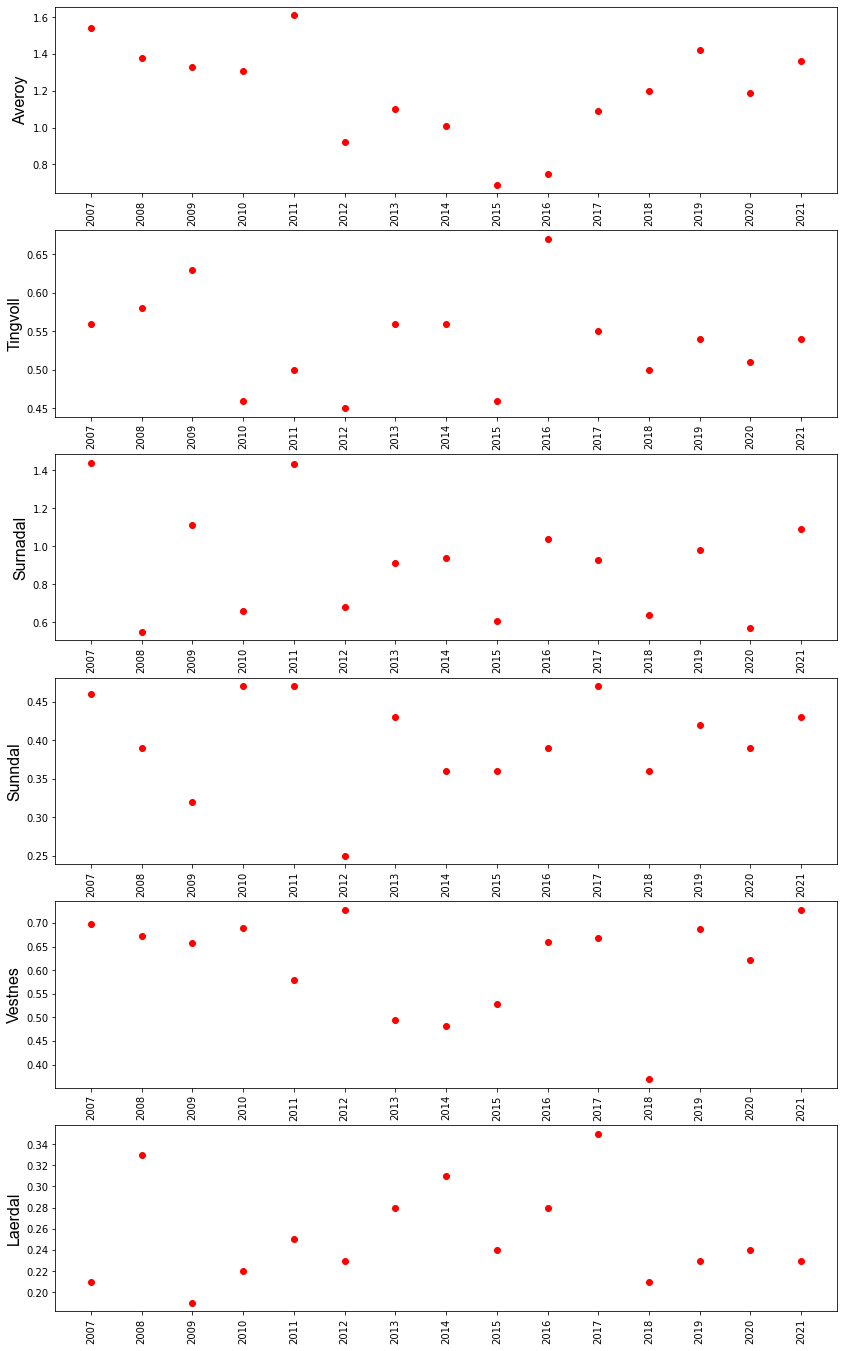

In [11]:
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]
fig, ax = plt.subplots(ncols=1, nrows=6, figsize=(14, 24))
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
c_v = []
q = 0
for municipality in municipalities:
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_outfield,
        seen_deer_obs_infield,
        hinds_per_stag_obs,
        total_harvest,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[q]

    if municipality == "Surnadal":
        empirical_observations = np.array(seen_deer_obs_infield)
    else:
        empirical_observations = np.array(seen_deer_obs)
    
    c_v.append(np.std(empirical_observations)/np.mean(empirical_observations))
    
    ax[q].plot(years, empirical_observations, 'ro')
    ax[q].set_ylabel(municipality, fontsize=16, **afont)
        
    ax[q].set_xticks(years)
    ax[q].set_xticklabels(years, rotation="vertical")
    q = q + 1
        
print("CV values for the six seen_deer observation sets: ", np.array(c_v))
print()
pass;

## Calculating the average culling number for Surnadal and Sunndal

In [12]:
municipalities = ["Surnadal", "Sunndal"]
data_municipality = [
    data_Surnadal,
    data_Sunndal,
]

q = 0
for municipality in municipalities:
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_outfield,
        seen_deer_obs_infield,
        hinds_per_stag_obs,
        total_harvest,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[q]

    total_culling = np.array(total_harvest)

    print(
        "Municipality = ",
        municipality,
        "  Mean annual culling = ",
        total_culling.mean(),
    )
    q = q + 1

Municipality =  Surnadal   Mean annual culling =  444.53333333333336
Municipality =  Sunndal   Mean annual culling =  459.0
